In [2]:
# Loading neccesary libraries

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np


In [3]:
# loading raw data and Analysis

youtube_data=pd.read_csv('Group9.WhiteHats.Dataset.csv', encoding="ISO-8859-1")

In [4]:
# Analysis and preprocessing of Raw data
print(youtube_data.shape)
print(youtube_data.columns)
print(youtube_data.info())
youtube_data.head()

(375942, 23)
Index(['Unnamed: 0', 'video_id', 'trending_date', 'title', 'channel_title',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country',
       'kind', 'etag', 'id', 'snippet', 'category_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              375942 non-null  int64  
 1   video_id                375942 non-null  object 
 2   trending_date           375942 non-null  object 
 3   title                   375942 non-null  object 
 4   channel_title           375942 non-null  object 
 5   category_id             375942 non-null  int64  
 6   publish_time            375942 non-null  object 
 7   tags       

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,kind,etag,id,snippet,category_name
0,0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Music
1,1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,...,False,False,False,NaN,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/G9LHzQmx44rX2S5ya...",23.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Comedy
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,...,NaN,False,False,NaN,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/G9LHzQmx44rX2S5ya...",23.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Comedy
3,3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,...,NaN,False,False,NaN,CA,youtube#videoCategory,NaN,24.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Entertainment
4,4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Music


In [5]:
#Dropping Duplicates
youtube_data.drop_duplicates()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,kind,etag,id,snippet,category_name
0,0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,...,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Music
1,1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,...,False,False,False,NaN,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/G9LHzQmx44rX2S5ya...",23.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Comedy
2,2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,...,NaN,False,False,NaN,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/G9LHzQmx44rX2S5ya...",23.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Comedy
3,3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,...,NaN,False,False,NaN,CA,youtube#videoCategory,NaN,24.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Entertainment
4,4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,...,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,375937,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,...,NaN,False,False,NaN,US,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Pets & Animals
375938,375938,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,...,NaN,False,False,NaN,US,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZ...",22.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",People & Blogs
375939,375939,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,...,False,False,False,NaN,US,youtube#videoCategory,NaN,24.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Entertainment
375940,375940,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,...,NaN,False,False,How Black Panther Should Have EndedWatch More ...,US,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1.0,"{'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'tit...",Film & Animation


In [ ]:
#changing datatype for date/timestamps columns
# keep these as pandas datetimes (datetime64[ns]) so pandas .dt accessor works on timedeltas
# use errors='coerce' and infer formats to avoid parsing exceptions; inspect results below
youtube_data["publish_time_clean"] = pd.to_datetime(youtube_data["publish_time"], errors='coerce', infer_datetime_format=True)

youtube_data['trending_date_clean'] = pd.to_datetime(youtube_data["trending_date"], errors='coerce', infer_datetime_format=True)

# Diagnostic: show dtype and number of parsing failures (NaT)
print('publish_time_clean dtype:', youtube_data['publish_time_clean'].dtype, 'NaT count:', youtube_data['publish_time_clean'].isna().sum())
print('trending_date_clean dtype:', youtube_data['trending_date_clean'].dtype, 'NaT count:', youtube_data['trending_date_clean'].isna().sum())
print(youtube_data[['publish_time_clean','trending_date_clean']].head())

In [21]:
# Removing unimportant columns:
# 'Unnamed: 0' : it's just an index column
# 'thumbnail_link': Not needed
# 'kind': unique value='youtube#videoCategory' and may be missing/not helpful
# Safely inspect 'kind' only if the column exists
if 'kind' in youtube_data.columns:
    print("kind column unique values:", youtube_data['kind'].unique())
else:
    print("Column 'kind' not present in dataframe")
# 'etag': data not needed
# 'snippet': json data coming from merging 2 data sources -- not needed

# Use errors='ignore' so missing columns don't raise an exception
youtube_data = youtube_data.drop(columns=['Unnamed: 0','thumbnail_link','kind','etag','snippet'], errors='ignore', axis=1)
print(youtube_data.columns)



Column 'kind' not present in dataframe
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'Country', 'id', 'category_name', 'publish_time_clean',
       'trending_date_clean', 'trending_time_delta'],
      dtype='object')


In [22]:
#Imputing missing values

youtube_data.isna().sum()


video_id                       0
trending_date                  0
title                          0
channel_title                  0
category_id                    0
publish_time                   0
tags                           0
views                          0
likes                          0
dislikes                       0
comment_count                  0
comments_disabled              0
ratings_disabled               0
video_error_or_removed         0
description               176282
Country                        0
id                             0
category_name                  0
publish_time_clean             0
trending_date_clean            0
trending_time_delta            0
dtype: int64

In [10]:
#4 columns have missing values
#Comments Disabled - important column - can be checked against comment_count columns
#description- not needed and cant impute - could be possible that video was uploaded with no description
#id - important column - can find a pattern for imputation
#Category_name - dependent of 'id' column

In [23]:
#imputation of comments disabled column
#if comment count is 0 and comment count is nan then it's safe to asssume that comments were disabled
#if comment count is more than 0 and comment count is nan then it's safe to asssume that comments were not disabled
youtube_data[(youtube_data['comments_disabled'].isna()) & (youtube_data['comment_count']==0)].head()



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,id,category_name,publish_time_clean,trending_date_clean,trending_time_delta


In [24]:
youtube_data.loc[(youtube_data['comments_disabled'].isna()) & (youtube_data['comment_count']==0),'comments_disabled']=True
youtube_data.loc[(youtube_data['comments_disabled'].isna()) & (youtube_data['comment_count']>0),'comments_disabled']=False
youtube_data.isna().sum()


video_id                       0
trending_date                  0
title                          0
channel_title                  0
category_id                    0
publish_time                   0
tags                           0
views                          0
likes                          0
dislikes                       0
comment_count                  0
comments_disabled              0
ratings_disabled               0
video_error_or_removed         0
description               176282
Country                        0
id                             0
category_name                  0
publish_time_clean             0
trending_date_clean            0
trending_time_delta            0
dtype: int64

In [25]:
#imputation of id and Category name columns
print(youtube_data.loc[(youtube_data['category_name'].isna()),].head())

# category_id is 29 for missing id and category_name columns
print(youtube_data.loc[(youtube_data['category_name'].isna()),'category_id'].unique())

Empty DataFrame
Columns: [video_id, trending_date, title, channel_title, category_id, publish_time, tags, views, likes, dislikes, comment_count, comments_disabled, ratings_disabled, video_error_or_removed, description, Country, id, category_name, publish_time_clean, trending_date_clean, trending_time_delta]
Index: []

[0 rows x 21 columns]
[]


In [26]:
#checking the connection between category_id and category_name

print(youtube_data.loc[(youtube_data['category_name'].notna()) & (youtube_data['category_id']==29),'category_name'].unique())


['Nonprofits & Activism']


In [27]:
#missing cells from id and category_name are linked to catergory_id=29 and it's related category_name is "Nonprofits & Activism"
youtube_data.loc[(youtube_data['category_name'].isna()) & (youtube_data['category_id']==29),'category_name']="Nonprofits & Activism"
youtube_data.loc[(youtube_data['id'].isna()) & (youtube_data['category_id']==29),'id']=29
youtube_data.isna().sum()

video_id                       0
trending_date                  0
title                          0
channel_title                  0
category_id                    0
publish_time                   0
tags                           0
views                          0
likes                          0
dislikes                       0
comment_count                  0
comments_disabled              0
ratings_disabled               0
video_error_or_removed         0
description               176282
Country                        0
id                             0
category_name                  0
publish_time_clean             0
trending_date_clean            0
trending_time_delta            0
dtype: int64

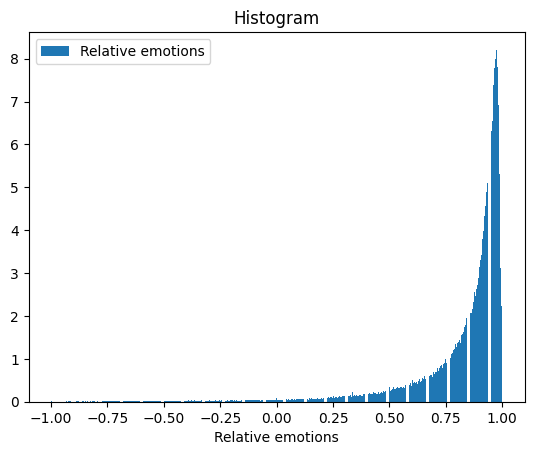

In [28]:
#Histogram to understand relative emotions connected with trending videos

#Relative emotion (for each video) = likes-dislies/likes+dislikes

#plotting relative emotion's data for each graph help us understand that majority of the trending videos are between 0 to 1

#(-1,0)=videos with more dislikes than likes

#(0,1)=videos with more likes than dislikes 

#defined statistical equation to find relative emotions for each video

x_axis= (youtube_data['likes']-youtube_data['dislikes'])/(youtube_data['likes']+youtube_data['dislikes'])
plt.hist(x_axis, density=True, bins='auto', histtype='bar', label='Relative emotions', rwidth=0.85)
plt.xlabel('Relative emotions')
plt.legend(loc="upper left")
plt.title("Histogram");
plt.show()

#Majority of trending videos from the dataset have positive relative emotions attached to it, driving them to go viral 

In [ ]:
#How much time is spent before video goes viral (Bar chart)
# trending_time_delta = diffrence between publish time and trending time
# compute raw delta (timedelta64[ns]) where possible
youtube_data["trending_time_delta"] = (youtube_data['trending_date_clean'] - youtube_data["publish_time_clean"])
# If the result is a timedelta dtype, extract days with .dt.days; otherwise coerce safely
if pd.api.types.is_timedelta64_dtype(youtube_data["trending_time_delta"]):
    youtube_data["trending_time_delta"] = youtube_data["trending_time_delta"].dt.days
else:
    # fallback: compute days per row handling NaT and non-datetime values
    def safe_days(x):
        try:
            if pd.isna(x):
                return pd.NA
            # if it's already a timedelta-like object
            return int(x / np.timedelta64(1, 'D'))
        except Exception:
            return pd.NA
    youtube_data["trending_time_delta"] = youtube_data["trending_time_delta"].apply(safe_days)
#yt_us = youtube_data[youtube_data["Country"]=='US'].reset_index(drop=True)
#categories with average time taken for trending
bar_df=youtube_data.groupby(['category_name'],as_index=False)['trending_time_delta'].mean()
bar_df=bar_df.sort_values(['trending_time_delta'])

plt.bar(bar_df['category_name'],bar_df['trending_time_delta'])
plt.xticks(rotation=90, ha='right')
plt.xlabel("Categories")
plt.ylabel("Average Time Taken Before Trending (Days)")
plt.title("Average time taken to trend in each category");
plt.show()
#Nonprofit & Activism, Shows, Movies, Howto & style and Entertainment are the top 5 categories taking minimum amount of time to trend the videos uploaded under them 
#Videos uploaded under Education category took the longest time to trend 

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Diagnostic: trending_time_delta summary
print('trending_time_delta dtype:', youtube_data['trending_time_delta'].dtype)
print('Number of missing trending_time_delta:', youtube_data['trending_time_delta'].isna().sum())
print('Sample values:')
print(youtube_data[['publish_time_clean','trending_date_clean','trending_time_delta']].head())
# show distribution summary for days where available
print(youtube_data['trending_time_delta'].describe())

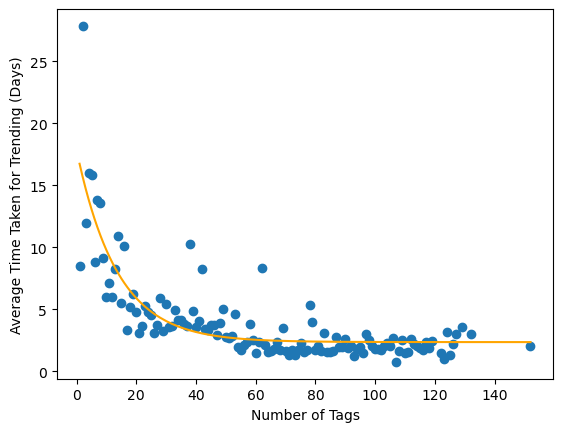

In [41]:
#Scatter plot
#number of tags vs time taken for trending
#splitting tags byb "|" and counting number of tags attached to any video
youtube_data['num_tags'] = youtube_data['tags'].apply(lambda x: len(x.split('|')))
# Many videos have [none] as a tag and they should be counted as 0 tag
youtube_data.loc[youtube_data['tags']=="[none]","'num_tags'"]=0

#
scatter_df=youtube_data[ (youtube_data["trending_time_delta"]<=5000)].groupby(['num_tags'],as_index=False)['trending_time_delta'].mean()

#Regression line for curve fitting - Exponential decay function: y = a*e^(-k*x) + b

# define type of function to search
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b
# curve fit
p0 = (1.,1.e-5,1.) # starting search koefs
opt, pcov = curve_fit(model_func, scatter_df["num_tags"],scatter_df["trending_time_delta"], p0)
a, k, b = opt
y2 = model_func(scatter_df["num_tags"], a, k, b) #fitted values

plt.scatter(scatter_df["num_tags"],scatter_df["trending_time_delta"]) # True values of Time taken
plt.plot(scatter_df["num_tags"],y2,color="orange") #fitted values of Time taken
plt.xlabel('Number of Tags')
plt.ylabel('Average Time Taken for Trending (Days)')
plt.show()

#Scatter chart showcases the exponentially decaying relationship between number of tags and days taken to trend
#Videos with higher number of tags took lesser days to trend compared to the videos with less number of tags
#40 to 60 tags improves trending delta significantly
#Fitted curve also showcases that time taken to trend video remains constant and does not change much when you have more than 60 number of tags

In [42]:
#Heatmap - relationship between Categories, Views and Total Engagement

# Total engagement = likes + dislikes + comments
youtube_data['engagement'] = youtube_data['likes'] + youtube_data['dislikes'] + youtube_data['comment_count']

#Binnig Enagagement column to make Categorical column
youtube_data['binned'] = pd.cut(youtube_data['engagement'], list(range(0,9000000,1000000)))
#youtube_data['binned'] = youtube_data['binned'].astype(str)


#Creating average views by Category and Enagagement dataframe
heat_df=youtube_data.groupby(['category_name','binned'],as_index=False)['views'].mean()

heat_df.loc[pd.isna(heat_df['views']),'views']=0
heat_df.head()

,category_name,binned,views
0,Autos & Vehicles,"(0, 1000000]",353692.089187
1,Autos & Vehicles,"(1000000, 2000000]",0.000000
2,Autos & Vehicles,"(2000000, 3000000]",0.000000
3,Autos & Vehicles,"(3000000, 4000000]",0.000000
4,Autos & Vehicles,"(4000000, 5000000]",0.000000


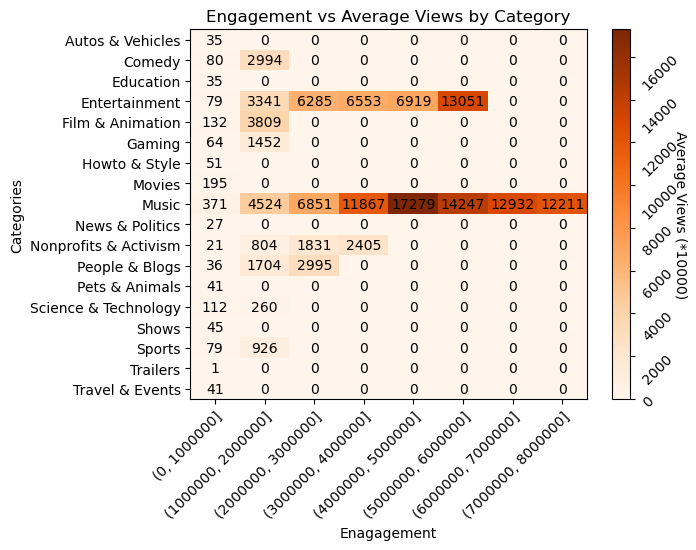

In [47]:
#imshow() function requires 2D np.array so creating 19x8 array for 19 Categories on Y and 8 Engagement Bins on X
start = 0
end = len(heat_df['views'])
step = 8
views_list = []
for i in range(start, end, step):
    x = i
    views_list.append(heat_df['views'][x:x+step])
views_list=np.array(views_list)

fig, ax = plt.subplots()
im = ax.imshow(views_list/10000,cmap='Oranges',aspect='auto')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(heat_df['binned'].unique())), labels=heat_df['binned'].unique())
ax.set_yticks(np.arange(len(heat_df['category_name'].unique())), labels=heat_df['category_name'].unique())

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
cb=plt.colorbar(im)
cb.ax.set_ylabel('Average Views (*10000)', rotation=270)
cb.ax.tick_params(rotation=45)
# Loop over data dimensions and create text annotations.
for i in range(len(heat_df['category_name'].unique())):
    for j in range(len(heat_df['binned'].unique())):
        text = ax.text(j, i, int(views_list[i, j]/10000),
                       ha="center", va="center", color="black")

ax.set_title("Engagement vs Average Views by Category")
plt.xlabel('Enagagement')
plt.ylabel('Categories')
plt.show()

#Heat Map showcases that as the engagement and views are directly proportional to each other 
#Music and Entertainment categories show this relation strongly in the heat map below

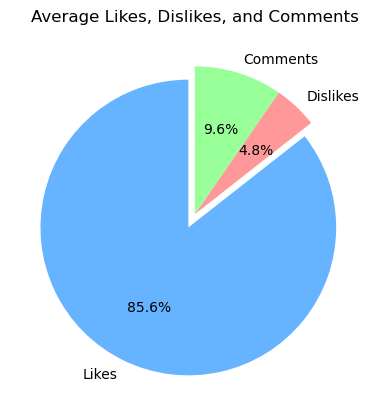

In [48]:
# Calculate the total number of likes, dislikes, and comment count
avg_likes = youtube_data['likes'].mean()
avg_dislikes = youtube_data['dislikes'].mean()
avg_comments = youtube_data['comment_count'].mean()

# Define the data and labels for the pie chart
data = [avg_likes, avg_dislikes, avg_comments]
labels = ['Likes', 'Dislikes', 'Comments']

# Define custom colors for each category
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Define the amount to explode each slice
explode = (0.1, 0, 0)

# Create a pie chart of the total number of likes, dislikes, and comment count
fig, ax = plt.subplots()
ax.pie(data, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('Average Likes, Dislikes, and Comments')

# Show the plot
plt.show()

#Pie Chart highlights the most engagement driving tools that contributes to the higher views leading to virality
#Audiences use 'Like' as an engagement tool more than any other options 

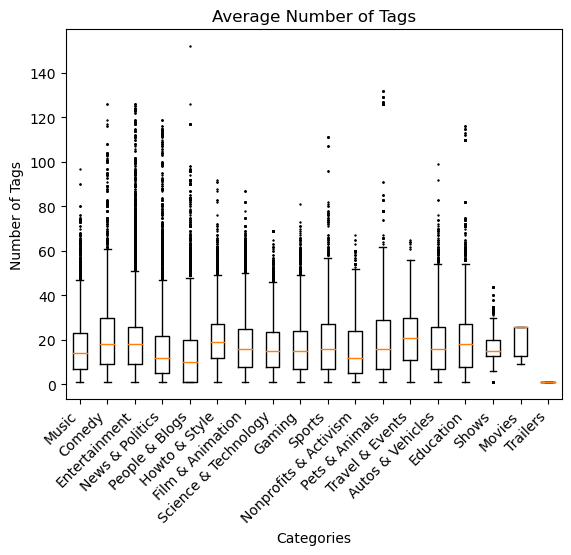

In [49]:
#Box Plot - Number of Tags distribution by Categories

youtube_data.loc[:,['category_name','num_tags']]

#Dictionary with each category as key and it's related Number of tags distribution as Value

box_dict={}
for i in youtube_data['category_name'].unique():
    box_dict[i] = youtube_data[youtube_data['category_name']==i]['num_tags']

plt.boxplot(box_dict.values(), labels=box_dict.keys(),showfliers=True,flierprops={'marker': '+', 'markersize': 1, 'markerfacecolor': 'fuchsia'})
plt.xticks(rotation=45, ha='right')

plt.xlabel('Categories')
plt.ylabel('Number of Tags')
plt.title('Average Number of Tags')
plt.show()
    
#Box Plot shares insight into number of tags used in videos for each category
#We could say there are median of 20 tags used on an average per category for each video 

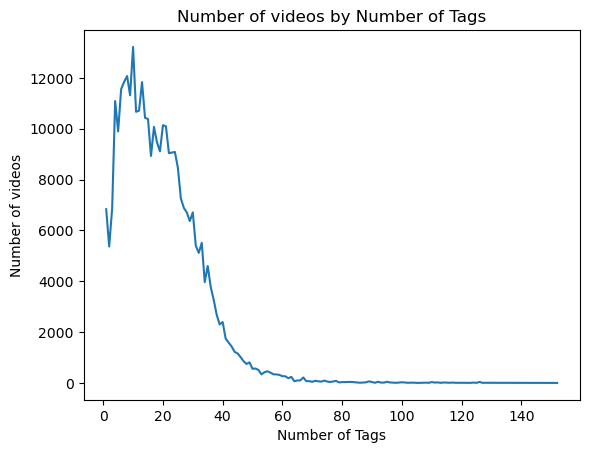

In [50]:
#Line Chart - Number of Videos by Number of Tags - Shows optimum tags 
line_df=youtube_data[youtube_data['tags']!='[none]'].groupby(['num_tags'],as_index=False).size()

plt.plot(line_df['num_tags'],line_df['size'])

# Add x and y labels and a title
plt.xlabel('Number of Tags')
plt.ylabel('Number of videos')
plt.title('Number of videos by Number of Tags')

plt.show()

#Highlights the relationship between number of videos and number of tags 

#Majority of videos have tags between 10 to 50

#Line Chart further elaborates on the findings of the Scatter chart and shares that 10-40 is the optimum number of tags to have to make a video trend

In [ ]:
#Conclusions:
#Number of tags is one of the most influential factors in driving virality on YouTube along with metrics like engagement, views etc. 

#Number of tags metrics is most effective in driving virality until a video has 50-60 tags

#We also found that videos that trend have higher relative emotion and tend to have more views and engagement. This suggests that viewers are more likely to engage with content that elicits a strong emotional response

#Music and Entertainment categories showcase the strongest relation in engagement driving higher views 

#Nonprofit and Activism videos take shortest time to trend due to the topicality factor

#Overall, the dataset provides valuable insights into the factors that contribute to a video's popularity on YouTube and can be useful for creators and marketers looking to optimize their content for engagement and views

In [ ]:
#Recommendations for the dataset: 
#Include more recent data:The current dataset includes data from November 2017 to June 2018. Consider adding more recent data to see how trends have changed over time.

#Include data on ad revenue:Consider adding data on ad revenue to the dataset to see how much money creators are making from their content. This could provide insights into what types of content are most profitable and what types of creators are most successful

#Expand geographical scope: The dataset only includes data from 10 countries, which may not be sufficient for conducting a comprehensive analysis of global trends.

#Additional features: While the current dataset provides information on several metrics such as views, likes, dislikes, comments, etc., additional features such as the duration of the video, the upload frequency of the channel, the audience demographics, etc. can provide further insights into the factors that influence video popularity.

#Data on viewers: The inclusion of this information can help researchers understand regional differences in video preferences and help creators tailor their content to specific geographic locations.

#Data on creators/ channels: Pre and post video upload data about the channel could help researchers do more efficient analysis of the impact created by each video

#Leveraging bots & YouTube API: Utilizing YouTube API can build more informative database that shares insights into factors driving virality on YouTube.